In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta, date
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma


In [3]:
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:

# read data to df
df = pd.read_csv('data_clean.csv')

# show df first 5 rows
df.head()

,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age,decade
0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,69.0,6
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,41.0,4
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,68.0,6
3,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,61.0,6
4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0,45.0,4


In [8]:
# find the total number of null values
df_missing = df.isnull().sum()
# Calculate the total number of values
df_values = df.size
# Calculate the percentage of missing values
p_t_missing = df_missing / df_values * 100
# Print the result
print(p_t_missing)
print(p_t_missing.sum())

first_name               0.000000
last_name                0.171111
gender                   0.000000
3y_bike_purchases        0.000000
DOB                      0.115556
job_title                0.680000
job_industry_category    0.912222
wealth_segment           0.000000
deceased_indicator       0.000000
owns_car                 0.000000
tenure                   0.096667
address                  0.004444
postcode                 0.004444
state                    0.004444
country                  0.004444
property_valuation       0.004444
Age                      0.000000
decade                   0.000000
dtype: float64
1.9977777777777779


In [11]:
feature_var = df[['3y_bike_purchases','Age','property_valuation','tenure']]

In [12]:
feature_var.corr().style.background_gradient(cmap='coolwarm')

,3y_bike_purchases,Age,property_valuation,tenure
3y_bike_purchases,1.000000,-0.024953,0.005124,-0.013329
Age,-0.024953,1.000000,0.000466,0.405070
property_valuation,0.005124,0.000466,1.000000,-0.007122
tenure,-0.013329,0.405070,-0.007122,1.000000


In [20]:
# df['gender'], df['job_industry_category'],df['wealth_segment'],df['postcode'],df['state']

<AxesSubplot:xlabel='job_industry_category', ylabel='3y_bike_purchases'>

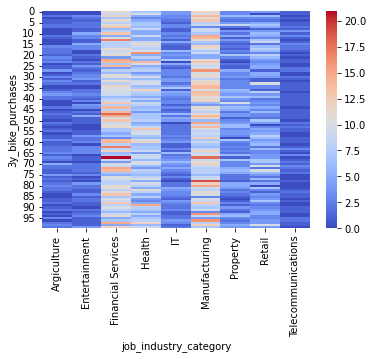

In [26]:
crosstab = pd.crosstab(df['3y_bike_purchases'], df['job_industry_category'])
sns.heatmap(crosstab, cmap='coolwarm')

<AxesSubplot:xlabel='gender', ylabel='3y_bike_purchases'>

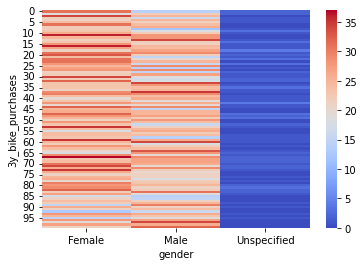

In [27]:
crosstab = pd.crosstab(df['3y_bike_purchases'], df['gender'])
sns.heatmap(crosstab, cmap='coolwarm')

<AxesSubplot:xlabel='wealth_segment', ylabel='3y_bike_purchases'>

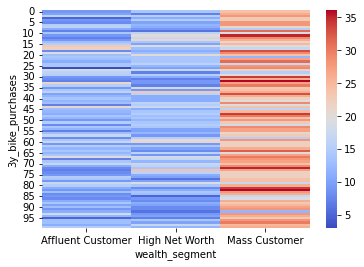

In [28]:
crosstab = pd.crosstab(df['3y_bike_purchases'], df['wealth_segment'])
sns.heatmap(crosstab, cmap='coolwarm')

<AxesSubplot:xlabel='state', ylabel='3y_bike_purchases'>

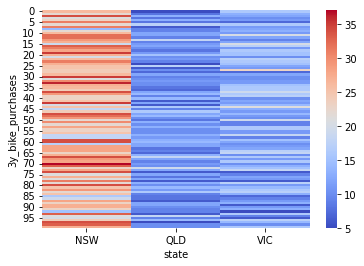

In [31]:
crosstab = pd.crosstab(df['3y_bike_purchases'], df['state'])
sns.heatmap(crosstab, cmap='coolwarm')

In [73]:
agg_data = df.groupby('job_industry_category')['3y_bike_purchases'].mean()

In [51]:
print(agg_data)

job_industry_category
Argiculture           52.287770
Entertainment         47.820809
Financial Services    49.188332
Health                49.701592
IT                    48.025547
Manufacturing         48.931864
Property              49.326284
Retail                49.371560
Telecommunications    46.329897
Name: 3y_bike_purchases, dtype: float64


In [54]:
# agg_data.plot(kind='bar')

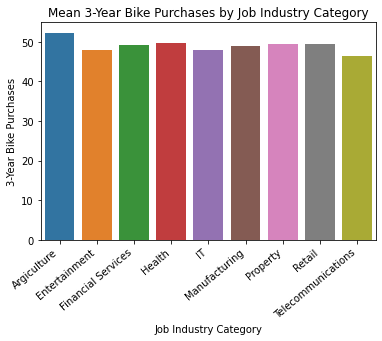

In [74]:
ax = sns.barplot(x=agg_data.index, y=agg_data.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# Add labels and title to the chart
plt.xlabel('Job Industry Category')
plt.ylabel('3-Year Bike Purchases')
plt.title('Mean 3-Year Bike Purchases by Job Industry Category')

# Show the plot
plt.show()


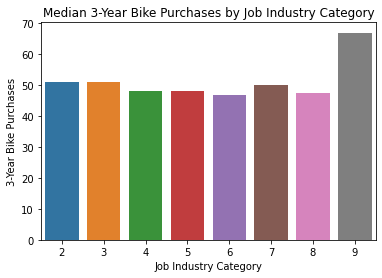

In [75]:
agg_data = df.groupby('decade')['3y_bike_purchases'].median()

ax = sns.barplot(x=agg_data.index, y=agg_data.values)

# Add labels and title to the chart
plt.xlabel('Job Industry Category')
plt.ylabel('3-Year Bike Purchases')
plt.title('Median 3-Year Bike Purchases by Job Industry Category')

# Show the plot
plt.show()

In [62]:
print(agg_data2)

  job_industry_category  3y_bike_purchases
0           Argiculture               7268
1         Entertainment               8273
2    Financial Services              48057
3                Health              37475
4                    IT              13159
5         Manufacturing              48834
6              Property              16327
7                Retail              21526
8    Telecommunications               4494


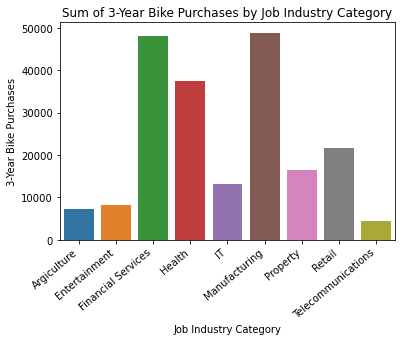

In [63]:

# Group the data by the 'job_industry_category' column and calculate the sum of the '3y_bike_purchases' column
agg_data2 = df.groupby('job_industry_category')['3y_bike_purchases'].sum()

# Use the reset_index method to convert the groupby object into a DataFrame
agg_data2 = agg_data2.reset_index()



# Use the plot method on the DataFrame to create a bar chart
ax1 = sns.barplot(x='job_industry_category', y='3y_bike_purchases', data=agg_data2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

# Add labels and title to the chart
plt.xlabel('Job Industry Category')
plt.ylabel('3-Year Bike Purchases')
plt.title('Sum of 3-Year Bike Purchases by Job Industry Category')

# Show the plot
plt.show()


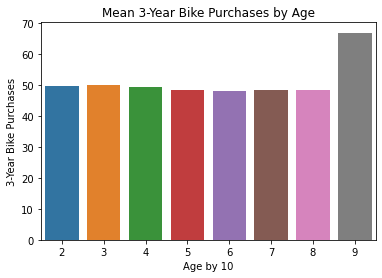

In [70]:
agg_data = df.groupby('decade')['3y_bike_purchases'].mean()

ax = sns.barplot(x=agg_data.index, y=agg_data.values)

# Add labels and title to the chart
plt.xlabel('Age by 10')
plt.ylabel('3-Year Bike Purchases')
plt.title('Mean 3-Year Bike Purchases by Age')

# Show the plot
plt.show()



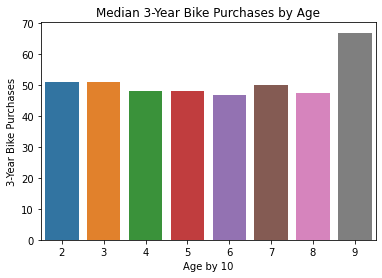

In [72]:
agg_data = df.groupby('decade')['3y_bike_purchases'].median()

ax = sns.barplot(x=agg_data.index, y=agg_data.values)

# Add labels and title to the chart
plt.xlabel('Age by 10')
plt.ylabel('3-Year Bike Purchases')
plt.title('Median 3-Year Bike Purchases by Age')

# Show the plot
plt.show()


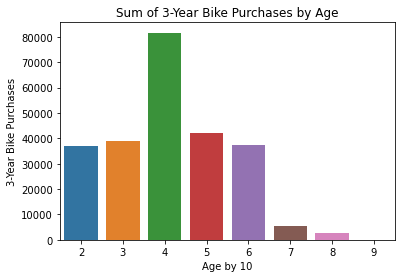

In [67]:
# Group the data by the 'job_industry_category' column and calculate the sum of the '3y_bike_purchases' column
agg_data2 = df.groupby('decade')['3y_bike_purchases'].sum()

# Use the reset_index method to convert the groupby object into a DataFrame
agg_data2 = agg_data2.reset_index()


# Use the plot method on the DataFrame to create a bar chart
ax1 = sns.barplot(x='decade', y='3y_bike_purchases', data=agg_data2)


# Add labels and title to the chart
plt.xlabel('Age by 10')
plt.ylabel('3-Year Bike Purchases')
plt.title('Sum of 3-Year Bike Purchases by Age')

# Show the plot
plt.show()

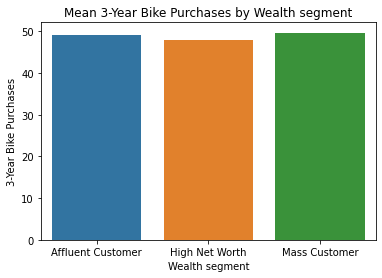

In [68]:
agg_data = df.groupby('wealth_segment')['3y_bike_purchases'].mean()

ax = sns.barplot(x=agg_data.index, y=agg_data.values)

# Add labels and title to the chart
plt.xlabel('Wealth segment')
plt.ylabel('3-Year Bike Purchases')
plt.title('Mean 3-Year Bike Purchases by Wealth segment')

# Show the plot
plt.show()


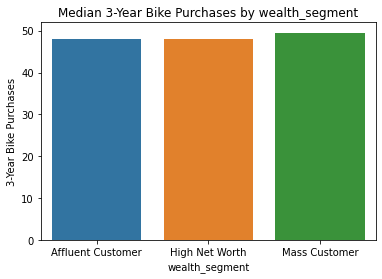

In [76]:
agg_data = df.groupby('wealth_segment')['3y_bike_purchases'].median()

ax = sns.barplot(x=agg_data.index, y=agg_data.values)

# Add labels and title to the chart
plt.xlabel('wealth_segment')
plt.ylabel('3-Year Bike Purchases')
plt.title('Median 3-Year Bike Purchases by wealth_segment')

# Show the plot
plt.show()

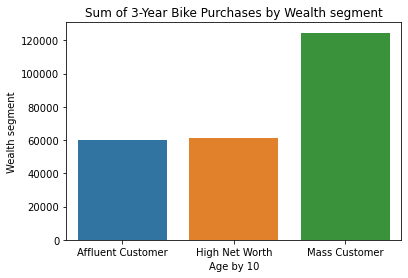

In [69]:
# Group the data by the 'job_industry_category' column and calculate the sum of the '3y_bike_purchases' column
agg_data2 = df.groupby('wealth_segment')['3y_bike_purchases'].sum()

# Use the reset_index method to convert the groupby object into a DataFrame
agg_data2 = agg_data2.reset_index()


# Use the plot method on the DataFrame to create a bar chart
ax1 = sns.barplot(x='wealth_segment', y='3y_bike_purchases', data=agg_data2)


# Add labels and title to the chart
plt.xlabel('Age by 10')
plt.ylabel('Wealth segment')
plt.title('Sum of 3-Year Bike Purchases by Wealth segment')

# Show the plot
plt.show()